In [1]:
from impact_consumer import export_impact, export_players_impact, export_probability_points
from impact_score.json_analyser.api_consumer import get_impact_details
from impact_score.json_analyser.analyse_json import Analyser
import pandas as pd
import matplotlib.pyplot as plt
a = Analyser()

Analyser created!


In [2]:
match_id = 60206

In [3]:
data = export_probability_points(match_id)["Round_3"]
y_values = data["probability_points"]
x_values = data["timestamp_points"]

In [4]:
# Plot x_values using scatterplot
len(y_values)

16

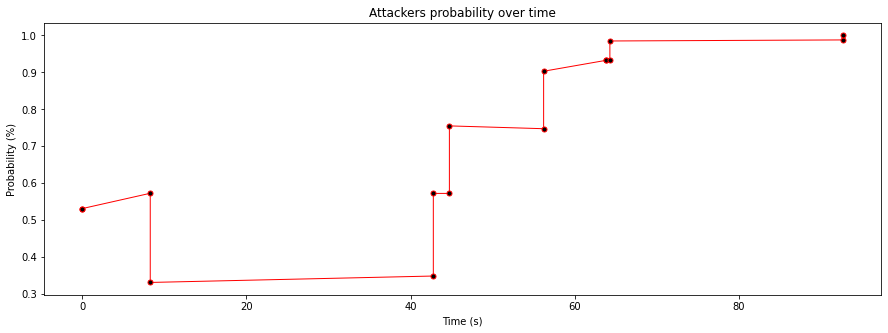

In [20]:
plt.figure(figsize=(15, 5))
plt.title('Attackers probability over time')
plt.xlabel('Time (s)')
plt.ylabel('Probability (%)')
# Change figsize
plt.plot(x_values, y_values, color="red", linewidth=1.0, marker='o', markersize=5, markerfacecolor="black")

In [12]:
y_values

[0.5314892479257054,
 0.5314892479257054,
 0.5729435024829793,
 0.33180982892057026,
 0.34917054646553625,
 0.5725792996409509,
 0.5725792996409509,
 0.7551727497024044,
 0.7475576436764222,
 0.9029712151166737,
 0.9325508909217101,
 0.9325508909217101,
 0.9325508909217101,
 0.9847887774577264,
 0.9876428608558843,
 1.0]